# Data importing and visualizing

In [3]:
#Dataset import

from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test)  = cifar10.load_data()

classes = ['airplane', 'automobile', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [26]:
# Check to see if we're using the GPU
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17912824197895939505
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14415560704
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13018800051615842475
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [10]:
# Display the number of samples in x_train, x_test, y_train, y_test
print("Initial shape or dimensions of x_train", str(x_train.shape))

# Print the number of samples in our data
print ("Number of samples in our training data: " + str(len(x_train)))
print ("Number of labels in our training data: " + str(len(y_train)))
print ("Number of samples in our test data: " + str(len(x_test)))
print ("Number of labels in our test data: " + str(len(y_test)))

# Print the image dimensions and no. of labels in our Training and Test Data
print("\n")
print ("Dimensions of x_train:" + str(x_train[0].shape))
print ("Labels in x_train:" + str(y_train.shape))
print("\n")
print ("Dimensions of x_test:" + str(x_test[0].shape))
print ("Labels in y_test:" + str(y_test.shape))

Initial shape or dimensions of x_train (50000, 32, 32, 3)
Number of samples in our training data: 50000
Number of labels in our training data: 50000
Number of samples in our test data: 10000
Number of labels in our test data: 10000


Dimensions of x_train:(32, 32, 3)
Labels in x_train:(50000, 1)


Dimensions of x_test:(32, 32, 3)
Labels in y_test:(10000, 1)


<Figure size 432x288 with 0 Axes>

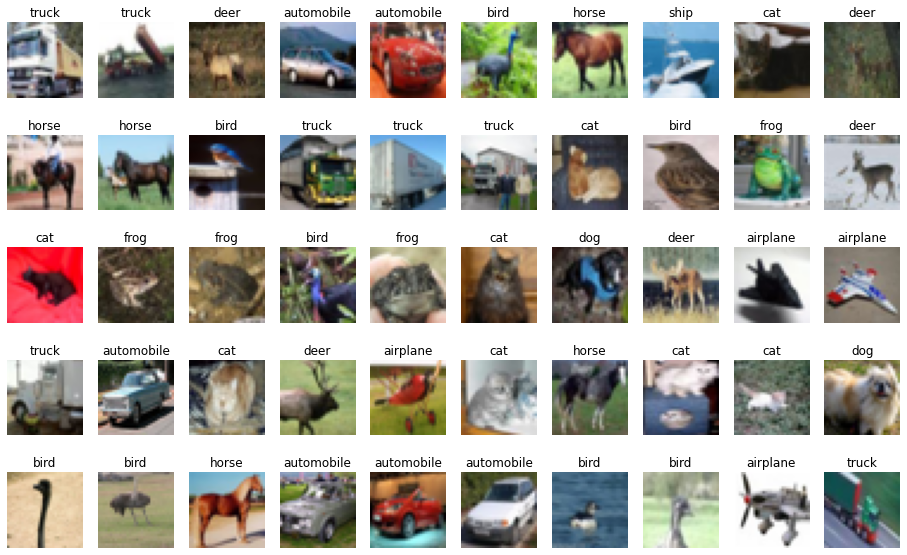

In [4]:
# Let's view the 50 first images 
import matplotlib.pyplot as plt

# Create figure and change size
figure = plt.figure()
plt.figure(figsize=(16,10))

# Set how many images we wish to see
num_of_images = 50 

# iterate index from 1 to 51
for index in range(1, num_of_images + 1):
    class_names = classes[y_train[index][0]]
    plt.subplot(5, 10, index).set_title(f'{class_names}')
    plt.axis('off')
    plt.imshow(x_train[index], cmap='gray_r')

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from tensorflow.keras import backend as K


# Reshape our data to be in the format [number of samples, width, height, color_depth]


# Change datatype to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


In [20]:
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# store the shape of a single image 
input_shape = (img_rows, img_cols, 3)

# Normalize our data between 0 and 1
#x_test /= 255.0

In [6]:
from tensorflow.keras.utils import to_categorical

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


# LeNet

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Display our data shape/dimensions
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Now we one hot encode outputs
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [50]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, AveragePooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD, Adadelta
from tensorflow.keras import regularizers

# create model
model = Sequential()

model.add(Conv2D(6, kernel_size=(5, 5),
                 activation='relu',
                 strides = 1,
                 input_shape=x_train.shape[1:]))
model.add(AveragePooling2D(pool_size = (2,2), strides = 2))
model.add(Conv2D(16, kernel_size=(5, 5),
                 activation='relu',
                 strides = 1,
                 input_shape=input_shape))
model.add(AveragePooling2D(pool_size = (2,2), strides = 2))
model.add(Conv2D(120, kernel_size=(5, 5),
                 activation='relu',
                 strides = 1,
                 input_shape=input_shape))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = Adadelta(),
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d_8 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_23 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_9 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_24 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 flatten_6 (Flatten)         (None, 120)              

In [51]:
# Training Parameters
batch_size = 128
epochs = 50

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

#model.save("mnist_LeNet.h5")

# Evaluate the performance of our trained model
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/50
391/391 [==============================] - 3s 6ms/step - loss: 3.0131 - accuracy: 0.1072 - val_loss: 2.7038 - val_accuracy: 0.1044
Epoch 2/50
391/391 [==============================] - 2s 5ms/step - loss: 2.5827 - accuracy: 0.1055 - val_loss: 2.4875 - val_accuracy: 0.1006
Epoch 3/50
391/391 [==============================] - 2s 5ms/step - loss: 2.4415 - accuracy: 0.1102 - val_loss: 2.3988 - val_accuracy: 0.1099
Epoch 4/50
391/391 [==============================] - 2s 5ms/step - loss: 2.3754 - accuracy: 0.1200 - val_loss: 2.3496 - val_accuracy: 0.1213
Epoch 5/50
391/391 [==============================] - 2s 5ms/step - loss: 2.3338 - accuracy: 0.1310 - val_loss: 2.3146 - val_accuracy: 0.1318
Epoch 6/50
391/391 [==============================] - 2s 5ms/step - loss: 2.3028 - accuracy: 0.1408 - val_loss: 2.2872 - val_accuracy: 0.1430
Epoch 7/50
391/391 [==============================] - 2s 5ms/step - loss: 2.2775 - accuracy: 0.1504 - val_loss: 2.2637 - val_accuracy: 0.1529
Epoch 

In [52]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter( y=history.history['val_loss'], name="val_loss"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter( y=history.history['loss'], name="train loss"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter( y=history.history['val_accuracy'], name="val accuracy"),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter( y=history.history['accuracy'], name="train accuracy"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Loss/Accuracy of CNN - CIFAR10 Model"
)

# Set x-axis title
fig.update_xaxes(title_text="Epoch")

# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> Loss", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> Accuracy", secondary_y=True)

fig.show()

In [18]:
!pip install --upgrade tf-keras-vis tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 1.6 MB/s 
     |████████████████████████████████| 578.0 MB 16 kB/s 
     |████████████████████████████████| 438 kB 84.8 MB/s 
     |████████████████████████████████| 1.7 MB 51.5 MB/s 
     |████████████████████████████████| 5.9 MB 52.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12

In [53]:
def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear


from tf_keras_vis.activation_maximization import ActivationMaximization

activation_maximization = ActivationMaximization(model, model_modifier, clone=False)


In [54]:
image_titles = ['airplane', 'dog', 'ship']


# classes = ['airplane', 'automobile', 'bird', 'cat',
#            'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def loss(output):
    return (output[0, 0], output[1, 5], output[2, 8])

In [55]:
# Define seed inputs whose shape is (samples, height, width, channels).

seed_input = tf.random.uniform((3, 32, 32, 3), 0, 255)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning:

Call to deprecated class PrintLogger. (Use `Progress` instead.) -- Deprecated since version 0.7.0.



Steps: 050	Scores: [[1.7148481607437134, 0.8347593545913696, 1.1154230833053589]],	Regularization: [('TotalVariation2D', [8.943482398986816, 8.696784019470215, 8.523380279541016]), ('Norm', [26.61550521850586, 26.725976943969727, 26.597166061401367])]
Steps: 100	Scores: [[1.8104835748672485, 0.17651879787445068, 1.1570464372634888]],	Regularization: [('TotalVariation2D', [6.171057224273682, 6.0243964195251465, 5.882910251617432]), ('Norm', [21.572429656982422, 21.48143768310547, 21.528223037719727])]
Steps: 150	Scores: [[2.7347311973571777, 1.100703239440918, 2.0644824504852295]],	Regularization: [('TotalVariation2D', [4.094057083129883, 3.8018429279327393, 3.935737371444702]), ('Norm', [17.78721809387207, 17.474842071533203, 17.6951847076416])]
Steps: 200	Scores: [[2.7039055824279785, 0.8663899898529053, 0.9973487854003906]],	Regularization: [('TotalVariation2D', [3.8191206455230713, 3.6761934757232666, 3.647463798522949]), ('Norm', [14.600488662719727, 14.115888595581055, 14.43335342

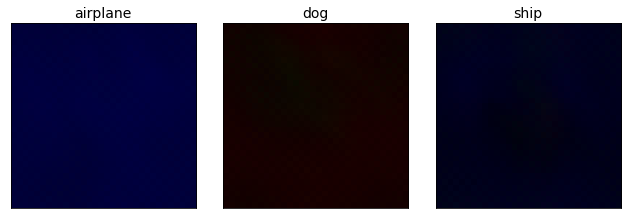

CPU times: user 9.94 s, sys: 386 ms, total: 10.3 s
Wall time: 9.72 s


In [56]:
%%time
from tf_keras_vis.utils.callbacks import Print
import numpy as np

# Do 500 iterations and Generate an optimizing animation
activations = activation_maximization(loss,
                                      seed_input=seed_input,
                                      steps=512,
                                      callbacks=[ Print(interval=50)])
images = [activation.astype(np.uint8) for activation in activations]

# Render
subplot_args = { 'nrows': 1, 'ncols': 3, 'figsize': (9, 3),
                 'subplot_kw': {'xticks': [], 'yticks': []} }
f, ax = plt.subplots(**subplot_args)
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=14)
    ax[i].imshow(images[i])
plt.tight_layout()

plt.show()

# AlexNet

In [57]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Display our data shape/dimensions
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Now we one hot encode outputs
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [58]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.utils import to_categorical


l2_reg = 0.001

# Initialize model
model = Sequential()

# 1st Conv Layer 
model.add(Conv2D(96, (11, 11), input_shape=x_train.shape[1:],
    padding='same', kernel_regularizer=l2(l2_reg)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Conv Layer 
model.add(Conv2D(256, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Conv Layer 
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 4th Conv Layer 
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(1024, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 5th Conv Layer 
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(1024, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 1st FC Layer
model.add(Flatten())
model.add(Dense(3072))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# 2nd FC Layer
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# 3rd FC Layer
model.add(Dense(num_classes))
model.add(BatchNormalization())
model.add(Activation('softmax'))

print(model.summary())

model.compile(loss = 'categorical_crossentropy',
              optimizer = Adadelta(),
              metrics = ['accuracy'])


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 32, 32, 96)        34944     
                                                                 
 batch_normalization_16 (Bat  (None, 32, 32, 96)       384       
 chNormalization)                                                
                                                                 
 activation_16 (Activation)  (None, 32, 32, 96)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 96)       0         
 2D)                                                             
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 256)       614656    
                                                                 
 batch_normalization_17 (Bat  (None, 16, 16, 256)     

In [59]:
# Training Parameters
batch_size = 64
epochs = 25

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

#model.save("CIFAR10_AlexNet_10_Epoch.h5")

# Evaluate the performance of our trained model
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/25
782/782 [==============================] - 90s 113ms/step - loss: 2.1134 - accuracy: 0.2514 - val_loss: 1.7625 - val_accuracy: 0.3958
Epoch 2/25
782/782 [==============================] - 84s 107ms/step - loss: 1.8375 - accuracy: 0.3467 - val_loss: 1.6664 - val_accuracy: 0.4356
Epoch 3/25
782/782 [==============================] - 84s 107ms/step - loss: 1.7443 - accuracy: 0.3874 - val_loss: 1.6081 - val_accuracy: 0.4616
Epoch 4/25
782/782 [==============================] - 84s 107ms/step - loss: 1.6798 - accuracy: 0.4150 - val_loss: 1.5605 - val_accuracy: 0.4770
Epoch 5/25
782/782 [==============================] - 84s 107ms/step - loss: 1.6322 - accuracy: 0.4371 - val_loss: 1.5250 - val_accuracy: 0.4914
Epoch 6/25
782/782 [==============================] - 84s 107ms/step - loss: 1.5932 - accuracy: 0.4565 - val_loss: 1.4959 - val_accuracy: 0.5045
Epoch 7/25
782/782 [==============================] - 84s 107ms/step - loss: 1.5618 - accuracy: 0.4684 - val_loss: 1.4704 - val_ac

In [60]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter( y=history.history['val_loss'], name="val_loss"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter( y=history.history['loss'], name="train loss"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter( y=history.history['val_accuracy'], name="val accuracy"),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter( y=history.history['accuracy'], name="train accuracy"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Loss/Accuracy of AlexNet - CIFAR10 Model"
)

# Set x-axis title
fig.update_xaxes(title_text="Epoch")

# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> Loss", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> Accuracy", secondary_y=True)

fig.show()

In [61]:
def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear


from tf_keras_vis.activation_maximization import ActivationMaximization

activation_maximization = ActivationMaximization(model, model_modifier, clone=False)


In [62]:
image_titles = ['airplane', 'dog', 'ship']


# classes = ['airplane', 'automobile', 'bird', 'cat',
#            'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def loss(output):
    return (output[0, 0], output[1, 5], output[2, 8])

In [63]:
# Define seed inputs whose shape is (samples, height, width, channels).

seed_input = tf.random.uniform((3, 32, 32, 3), 0, 255)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning:

Call to deprecated class PrintLogger. (Use `Progress` instead.) -- Deprecated since version 0.7.0.



Steps: 050	Scores: [[1.5708327293395996, 0.43635082244873047, 1.6136144399642944]],	Regularization: [('TotalVariation2D', [6.651521682739258, 6.676443099975586, 6.5391693115234375]), ('Norm', [27.148317337036133, 28.41766929626465, 27.47432518005371])]
Steps: 100	Scores: [[1.2265149354934692, -0.08115063607692719, 1.516718864440918]],	Regularization: [('TotalVariation2D', [5.016295909881592, 5.095169544219971, 5.012417316436768]), ('Norm', [22.133914947509766, 23.158565521240234, 22.5712947845459])]
Steps: 150	Scores: [[1.2060800790786743, -0.12364546954631805, 1.4630101919174194]],	Regularization: [('TotalVariation2D', [4.934170246124268, 4.780531406402588, 4.790173053741455]), ('Norm', [18.323427200317383, 19.315780639648438, 18.88016128540039])]
Steps: 200	Scores: [[1.3275607824325562, -0.053694069385528564, 1.528967261314392]],	Regularization: [('TotalVariation2D', [3.9086923599243164, 4.003950595855713, 3.7906787395477295]), ('Norm', [15.090588569641113, 16.0803165435791, 15.71140

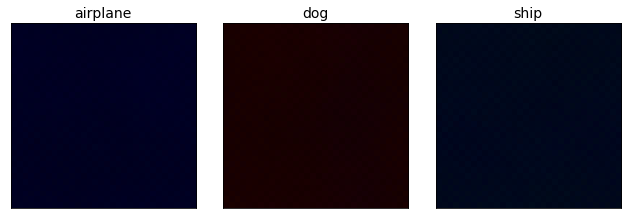

CPU times: user 19.9 s, sys: 399 ms, total: 20.3 s
Wall time: 19.7 s


In [64]:
%%time
from tf_keras_vis.utils.callbacks import Print
import numpy as np

# Do 500 iterations and Generate an optimizing animation
activations = activation_maximization(loss,
                                      seed_input=seed_input,
                                      steps=512,
                                      callbacks=[ Print(interval=50)])
images = [activation.astype(np.uint8) for activation in activations]

# Render
subplot_args = { 'nrows': 1, 'ncols': 3, 'figsize': (9, 3),
                 'subplot_kw': {'xticks': [], 'yticks': []} }
f, ax = plt.subplots(**subplot_args)
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=14)
    ax[i].imshow(images[i])
plt.tight_layout()

plt.show()

# VGG16


In [7]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Display our data shape/dimensions
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Now we one hot encode outputs
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.utils import to_categorical


l2_reg = 0.001

# Initialize model
model = Sequential()

#1 layer
model.add(Conv2D(input_shape=x_train.shape[1:],filters=64,kernel_size=(3,3),
                 padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),
                 padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

#2 layer
model.add(Conv2D(filters=128,kernel_size=(3,3),
                 padding="same", activation="relu"))
model.add(Conv2D(filters=128,kernel_size=(3,3),
                 padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

#3 layer
model.add(Conv2D(filters=256,kernel_size=(3,3),
                 padding="same", activation="relu"))
model.add(Conv2D(filters=256,kernel_size=(3,3),
                 padding="same", activation="relu"))
model.add(Conv2D(filters=256,kernel_size=(3,3),
                 padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

#4 layer
# model.add(Conv2D(filters=512,kernel_size=(3,3),
#                  padding="same", activation="relu"))
# model.add(Conv2D(filters=512,kernel_size=(3,3),
#                  padding="same", activation="relu"))
# model.add(Conv2D(filters=512,kernel_size=(3,3),
#                  padding="same", activation="relu"))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

# #5 layer
# model.add(Conv2D(filters=512,kernel_size=(3,3),
#                  padding="same", activation="relu"))
# model.add(Conv2D(filters=512,kernel_size=(3,3),
#                  padding="same", activation="relu"))
# model.add(Conv2D(filters=512,kernel_size=(3,3),
#                  padding="same", activation="relu"))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

print(model.summary())

model.compile(loss = 'categorical_crossentropy',
              optimizer = Adadelta(),
              metrics = ['accuracy'])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_24 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_25 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                 

In [13]:
# Training Parameters
batch_size = 64
epochs = 30

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

#model.save("CIFAR10_AlexNet_10_Epoch.h5")

# Evaluate the performance of our trained model
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/30
782/782 [==============================] - 20s 24ms/step - loss: 2.0078 - accuracy: 0.2860 - val_loss: 1.8113 - val_accuracy: 0.3567
Epoch 2/30
782/782 [==============================] - 19s 24ms/step - loss: 1.7012 - accuracy: 0.4008 - val_loss: 1.6560 - val_accuracy: 0.4078
Epoch 3/30
782/782 [==============================] - 18s 24ms/step - loss: 1.5908 - accuracy: 0.4407 - val_loss: 1.5524 - val_accuracy: 0.4563
Epoch 4/30
782/782 [==============================] - 18s 23ms/step - loss: 1.5175 - accuracy: 0.4686 - val_loss: 1.5276 - val_accuracy: 0.4596
Epoch 5/30
782/782 [==============================] - 18s 24ms/step - loss: 1.4641 - accuracy: 0.4877 - val_loss: 1.5023 - val_accuracy: 0.4641
Epoch 6/30
782/782 [==============================] - 18s 24ms/step - loss: 1.4200 - accuracy: 0.5046 - val_loss: 1.4247 - val_accuracy: 0.5020
Epoch 7/30
782/782 [==============================] - 18s 24ms/step - loss: 1.3816 - accuracy: 0.5189 - val_loss: 1.3898 - val_accuracy:

In [14]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter( y=history.history['val_loss'], name="val_loss"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter( y=history.history['loss'], name="train loss"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter( y=history.history['val_accuracy'], name="val accuracy"),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter( y=history.history['accuracy'], name="train accuracy"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Loss/Accuracy of MiniVGG16 - CIFAR10 Model"
)

# Set x-axis title
fig.update_xaxes(title_text="Epoch")

# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> Loss", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> Accuracy", secondary_y=True)

fig.show()